In [1]:
## Importing the necessary packages and setting up the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
import os
import matplotlib as mpl
import sklearn
import seaborn as sns
import tensorflow as tf
import scipy

mpl.rcParams["axes.grid"] = False
%matplotlib inline

In [2]:
dataset_path = Path(os.getcwd()) / "production_data" / "volve_production_data_working.xlsx"

In [3]:
## Installing openpyxl library to read the excel file in pandas
# pip install openpyxl

In [4]:
prod_df = pd.read_excel(dataset_path, parse_dates = [0])

In [5]:
prod_df.head()

,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,7405,0.0,0.00000,0.00000,0.00000,0.0,0.000000,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production
1,2014-04-08,7405,0.0,NaN,NaN,NaN,0.0,1.003059,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production
2,2014-04-09,7405,0.0,NaN,NaN,NaN,0.0,0.979008,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production
3,2014-04-10,7405,0.0,NaN,NaN,NaN,0.0,0.545759,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production
4,2014-04-11,7405,0.0,310.37614,96.87589,277.27826,0.0,1.215987,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production


In [6]:
prod_df.describe()

,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,9161.000000,9161.000000,8980.000000,8980.000000,8980.000000,7890.000000,8919.000000,9155.000000,9146.000000,9155.000000,9161.000000,9161.000000,9161.000000,15.0
mean,6034.808645,20.168721,181.803869,77.162969,154.028787,14.856100,55.168533,45.377811,67.728440,19.170492,1095.631548,161049.059703,1672.151332,0.0
std,824.532027,8.293401,109.712363,45.657948,76.752373,8.406822,36.692924,24.752631,27.719028,22.580005,1323.538151,188136.410434,1706.982853,0.0
min,5351.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000,0.0
25%,5351.000000,24.000000,0.000000,0.000000,83.665361,10.841437,18.952989,31.148062,56.577834,3.356379,190.690000,29430.590000,19.870000,0.0
50%,5599.000000,24.000000,232.896939,103.186689,175.588861,16.308598,52.096877,37.933620,80.071250,9.566033,557.550000,87749.660000,1097.790000,0.0
75%,7078.000000,24.000000,255.401455,106.276591,204.319964,21.306125,99.924288,57.101268,88.062202,26.967948,1345.200000,202482.300000,3260.950000,0.0
max,7405.000000,25.000000,397.588550,108.502178,345.906770,30.019828,100.000000,137.311030,93.509584,125.718570,5901.840000,851131.520000,8019.740000,0.0


In [7]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9161 entries, 0 to 9160
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   9161 non-null   datetime64[ns]
 1   NPD_WELL_BORE_CODE        9161 non-null   int64         
 2   ON_STREAM_HRS             9161 non-null   float64       
 3   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 5   AVG_DP_TUBING             8980 non-null   float64       
 6   AVG_ANNULUS_PRESS         7890 non-null   float64       
 7   AVG_CHOKE_SIZE_P          8919 non-null   float64       
 8   AVG_CHOKE_UOM             9161 non-null   object        
 9   AVG_WHP_P                 9155 non-null   float64       
 10  AVG_WHT_P                 9146 non-null   float64       
 11  DP_CHOKE_SIZE             9155 non-null   float64       
 12  BORE_OIL_VOL        

In [8]:
prod_df.drop(["AVG_CHOKE_UOM", "FLOW_KIND", "AVG_DP_TUBING", "BORE_WI_VOL", "AVG_ANNULUS_PRESS"], axis = 1, inplace = True)

In [9]:
## Function to break the dataset into separate datasets so that each dataset only contains a single well data
## Returns a dictionary with key as well id and values as the corresponding dataset for that well

def wellwise_break(df):
    wells = df.NPD_WELL_BORE_CODE.unique()
    df_wells = {}
    for well in wells:
        df_wells[well] = df[df["NPD_WELL_BORE_CODE"] == well].reset_index(drop = True)
        df_wells[well] = df_wells[well].drop(["NPD_WELL_BORE_CODE"], axis = 1)
    return df_wells

In [10]:
well_df_dict = wellwise_break(prod_df)

In [11]:
list(well_df_dict.keys())

[7405, 7078, 5599, 5769, 7289, 5351]

In [12]:
# A utility function to save the figures in the "figures" folder inside the working directory

def fig_save(fig, name, path = 'C:\\Users\\spect\\OneDrive\\Desktop\\ML_conda_projects\\spectre_lab\\volve_dataset_project\\figures'):
    fig.savefig(os.path.join(path, name + ".png"), dpi = 1000, bbox_inches = "tight")
    print(os.path.join(path, name + ".png"))

C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_7405.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_7078.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_5599.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_5769.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_7289.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_5351.png


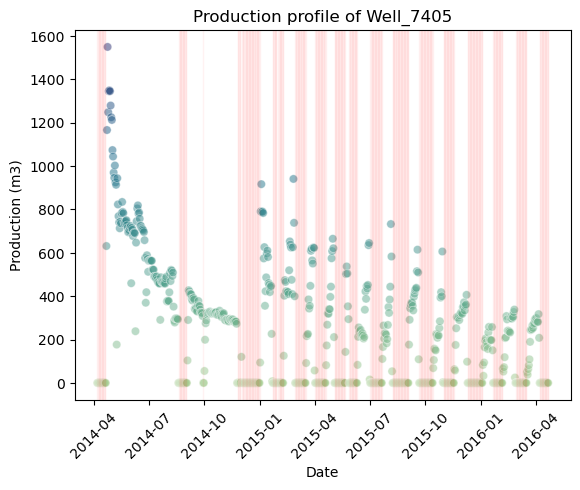

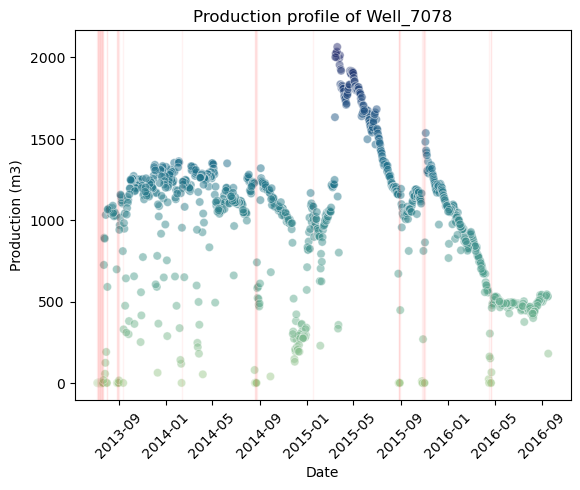

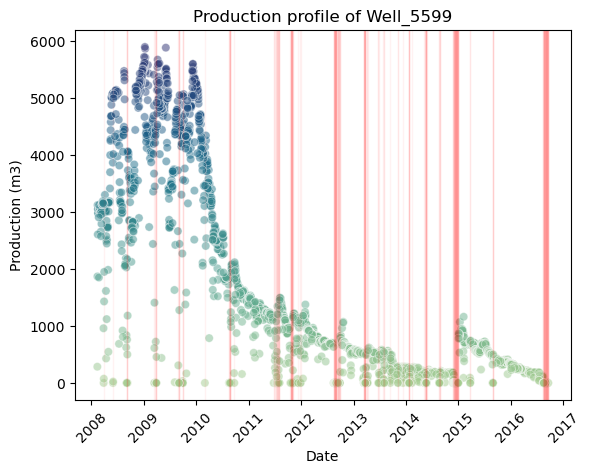

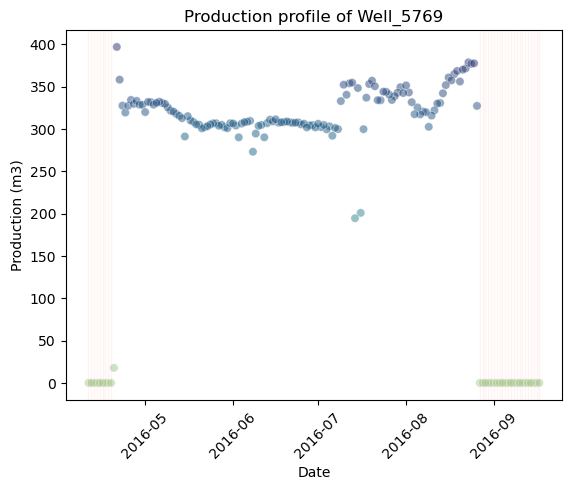

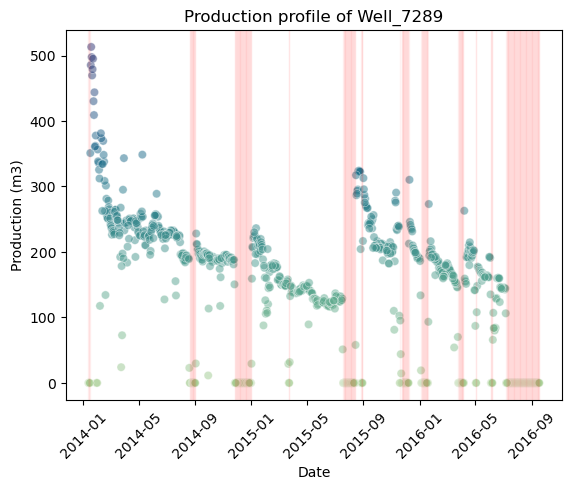

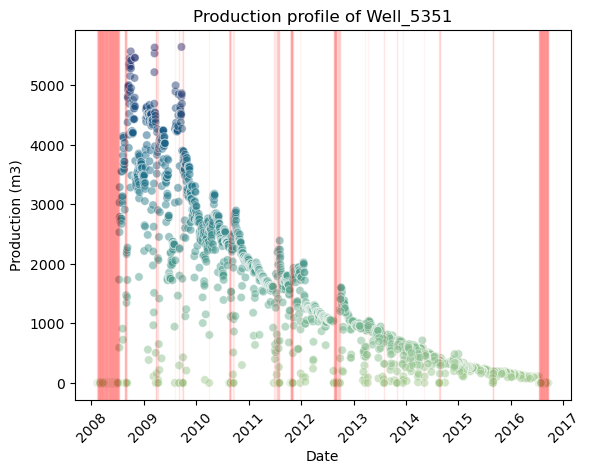

In [13]:
# Visualizing the production profile of all the wells...

for (well, df) in zip(well_df_dict.keys(), well_df_dict.values()):
    df_nf_dates = df[df.ON_STREAM_HRS == 0]["DATEPRD"]
    fig, ax_1 = plt.subplots()
    ax_1 = sns.scatterplot(x = df.DATEPRD, y = df.BORE_OIL_VOL, hue = df.BORE_OIL_VOL, 
                           palette = "crest", alpha = 0.5, legend = False)
    plt.xticks(rotation = 45)
    for date in df_nf_dates:
        ax_1.axvline(date, color = "r" , linewidth = 1, alpha = 0.05)
    ax_1.set(title = f"Production profile of Well_{well}", xlabel = "Date", ylabel = "Production (m3)")
    fig_save(fig, f"Production profile of Well_{well}")

After cisualizing the production profiles for all the wells, we choose the well 5351 for building our model as it has:
1. large number of sample points taken over a long period of time, and
2. its production follows the typical declining production trend seen in a typical oil well

In [14]:
df_5351 = well_df_dict[5351].copy()

# Cleaning the Dataset

In [15]:
df_5351.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3056 non-null   datetime64[ns]
 1   ON_STREAM_HRS             3056 non-null   float64       
 2   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64       
 4   AVG_CHOKE_SIZE_P          2860 non-null   float64       
 5   AVG_WHP_P                 3056 non-null   float64       
 6   AVG_WHT_P                 3056 non-null   float64       
 7   DP_CHOKE_SIZE             3056 non-null   float64       
 8   BORE_OIL_VOL              3056 non-null   float64       
 9   BORE_GAS_VOL              3056 non-null   float64       
 10  BORE_WAT_VOL              3056 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 262.8 KB


AVG_CHOKE_SIZE_P feature has 196 nan values. We'll drop the instances with no choke size values.

AVG_DOWNHOLE_PRESSURE and AVG_DOWNHOLE_TEMPERATURE both have 6 nan values within common instances. This is probably due to some sensor error as the production is non-zero in these instances. We'll also drop these instances.

In [16]:
## Removing Dates on which the well flowed for zero hours from the dataset
df_5351.drop(index = list(df_5351[df_5351.ON_STREAM_HRS == 0].index), axis = 0, inplace = True)

## Removing Dates on which the well produced zero m3 oil from the dataset
df_5351.drop(index = list(df_5351[df_5351.BORE_OIL_VOL == 0].index), axis = 0, inplace = True)

## Removing Instances with null values in CHOKE Size and Downhole Pressure/Temp
df_5351.drop(index = list(df_5351[pd.isna(df_5351.AVG_CHOKE_SIZE_P)].index), axis = 0, inplace = True)
df_5351.drop(index = list(df_5351[pd.isna(df_5351.AVG_DOWNHOLE_PRESSURE)].index), axis = 0, inplace = True)

df_5351.reset_index(drop = True, inplace = True)

In [17]:
df_5351.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   2717 non-null   datetime64[ns]
 1   ON_STREAM_HRS             2717 non-null   float64       
 2   AVG_DOWNHOLE_PRESSURE     2717 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  2717 non-null   float64       
 4   AVG_CHOKE_SIZE_P          2717 non-null   float64       
 5   AVG_WHP_P                 2717 non-null   float64       
 6   AVG_WHT_P                 2717 non-null   float64       
 7   DP_CHOKE_SIZE             2717 non-null   float64       
 8   BORE_OIL_VOL              2717 non-null   float64       
 9   BORE_GAS_VOL              2717 non-null   float64       
 10  BORE_WAT_VOL              2717 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 233.6 KB


In [18]:
df_5351.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000
mean,23.050687,246.505180,101.647452,72.917002,43.807395,85.825170,13.757965,1443.872091,211714.204891,2620.978601
std,3.438220,25.077625,8.742068,27.658527,18.125673,5.836733,16.542586,1288.453491,181932.248688,1282.606590
min,0.625000,0.000000,0.000000,2.485842,0.000000,12.134665,1.450701,4.300000,856.020000,-59.190000
25%,24.000000,240.602292,99.873083,44.923847,31.499809,85.357485,2.616243,330.840000,50906.870000,2126.160000
50%,24.000000,247.191777,101.782098,76.692234,34.951201,87.383659,5.696694,1040.770000,164156.910000,3101.530000
75%,24.000000,261.519886,105.141984,100.000000,49.828866,88.717042,17.151500,2235.480000,327273.000000,3492.760000
max,25.000000,289.897009,106.772733,100.000000,115.184383,93.509584,82.983969,5644.370000,789974.730000,5691.770000


In [19]:
## Some data points have ON_STREAM_HRS > 24...setting them to 24

for index in df_5351[df_5351.ON_STREAM_HRS > 24].index:
    df_5351.loc[index, "ON_STREAM_HRS"] = 24

In [20]:
## Since the Well head Pressure can't be zero for non-zero oil production, we are replacing it with the median value
df_5351.loc[df_5351[df_5351.AVG_WHP_P <= 1].index, "AVG_WHP_P"] = df_5351.AVG_WHP_P.median()

## Similarly, since the Downhole Pressure and Temperature can't be zero for non-zero oil production, 
## we are replacing it with the median value
df_5351.loc[df_5351[df_5351.AVG_DOWNHOLE_PRESSURE == 0].index, "AVG_DOWNHOLE_PRESSURE"] = df_5351.AVG_DOWNHOLE_PRESSURE.median()
df_5351.loc[df_5351[df_5351.AVG_DOWNHOLE_TEMPERATURE == 0].index, "AVG_DOWNHOLE_TEMPERATURE"] = df_5351.AVG_DOWNHOLE_TEMPERATURE.median()

In [21]:
df_5351.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000
mean,23.049285,247.869875,102.209370,72.917002,43.845806,85.825170,13.757965,1443.872091,211714.204891,2620.978601
std,3.437653,17.071416,4.364058,27.658527,18.069896,5.836733,16.542586,1288.453491,181932.248688,1282.606590
min,0.625000,49.450440,20.959721,2.485842,27.185420,12.134665,1.450701,4.300000,856.020000,-59.190000
25%,24.000000,240.886223,99.887850,44.923847,31.508247,85.357485,2.616243,330.840000,50906.870000,2126.160000
50%,24.000000,247.191777,101.782098,76.692234,34.951201,87.383659,5.696694,1040.770000,164156.910000,3101.530000
75%,24.000000,261.519886,105.141984,100.000000,49.828866,88.717042,17.151500,2235.480000,327273.000000,3492.760000
max,24.000000,289.897009,106.772733,100.000000,115.184383,93.509584,82.983969,5644.370000,789974.730000,5691.770000


In [22]:
## Sorting the values in ascending order wrt the date column

df_5351 = df_5351.sort_values(["DATEPRD"])
df_5351.reset_index(inplace = True, drop = True)

In [23]:
## Saving the cleaned 5351 well production data to excel file
working_df_path = dataset_path.parent / "working_df_v2.xlsx"
df_5351.to_excel(str(working_df_path), index = False)  ##index = False doesn't save the index

In [24]:
df = pd.read_excel(working_df_path)

We will use the average flow rate feature AVG_OIL_FLOW_RATE instead of BORE_OIL_VOL as the target variable as it is a more appropriate metric.

In [25]:
## Adding the feature for cummulative oil produced by shifting the cumulative sum of oil produced by 1 row downwards
## Not adding cummulative water and cummulative gas produced because they are highly correlated to Cummulative Oil Produced

# df["CUMM_OIL"] = np.r_[0, np.cumsum(df.loc[:,["BORE_OIL_VOL"]]).values.ravel()[1:]]

In [26]:
## Adding a field called AVG_OIL_FLOW_RATE

df["AVG_OIL_FLOW_RATE"] = df.BORE_OIL_VOL/df.ON_STREAM_HRS

In [27]:
df.head()

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,AVG_OIL_FLOW_RATE
0,2008-07-13,24.00,260.866875,103.292880,21.052993,100.714919,52.381899,69.539413,1735.26,252235.23,4.00,72.302500
1,2008-07-14,5.57,256.248230,104.017718,27.223459,99.598318,71.115352,68.016167,592.36,88949.00,1.37,106.348294
2,2008-07-15,24.00,254.982785,103.967009,27.277954,98.649941,67.590753,66.948884,2532.21,373786.28,5.84,105.508750
3,2008-07-16,24.00,251.475921,104.210557,30.650552,95.658734,73.782251,63.663812,3030.71,447840.09,9.13,126.279583
4,2008-07-17,24.00,249.346191,104.339184,32.562537,93.585252,78.035440,61.337700,3288.08,474614.43,7.58,137.003333


In [28]:
## Defining a function to plot the Date vs Flow rate chart
def date_vs_prod(df, nf_plot = False):
    fig, ax_1 = plt.subplots()
    sns.scatterplot(data = df, x = "DATEPRD", y = "AVG_OIL_FLOW_RATE", hue = "AVG_OIL_FLOW_RATE", alpha = 0.5, size = 5, ax = ax_1,
                   legend = False, palette="crest")
    if nf_plot:
        nf_dates = df[df.ON_STREAM_HRS == 0]
        nf_dates = nf_dates.iloc[:,0].values
        for date in nf_dates:
            ax_1.axvline(date, color = "r" , linewidth = 1, alpha = 0.05)
    return fig

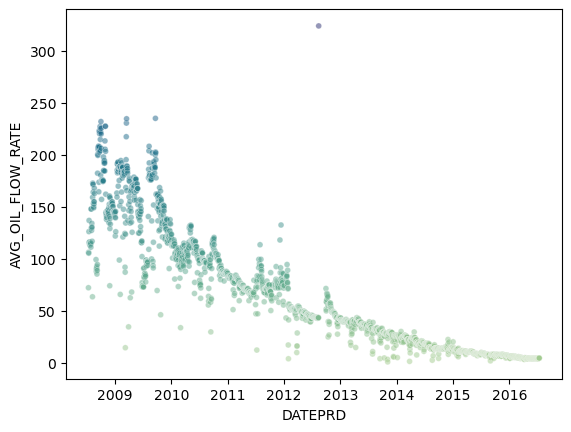

In [29]:
## Testing the above function
plot = date_vs_prod(df)

Now our data looks ready for EDA :)

## EDA

In [30]:
# #Training dataset is taken to be all the data points before after April 2013 and before June 2015.
# # Validation and testing dataset is taken to be all the data points after June 2015

# df_5351_train = df_5351[(df_5351.DATEPRD >= pd.to_datetime("04/01/2013")) & (df_5351.DATEPRD < pd.to_datetime("06/01/2015"))]
# df_5351_val_test = df_5351[df_5351.DATEPRD >= pd.to_datetime("06/01/2015")]

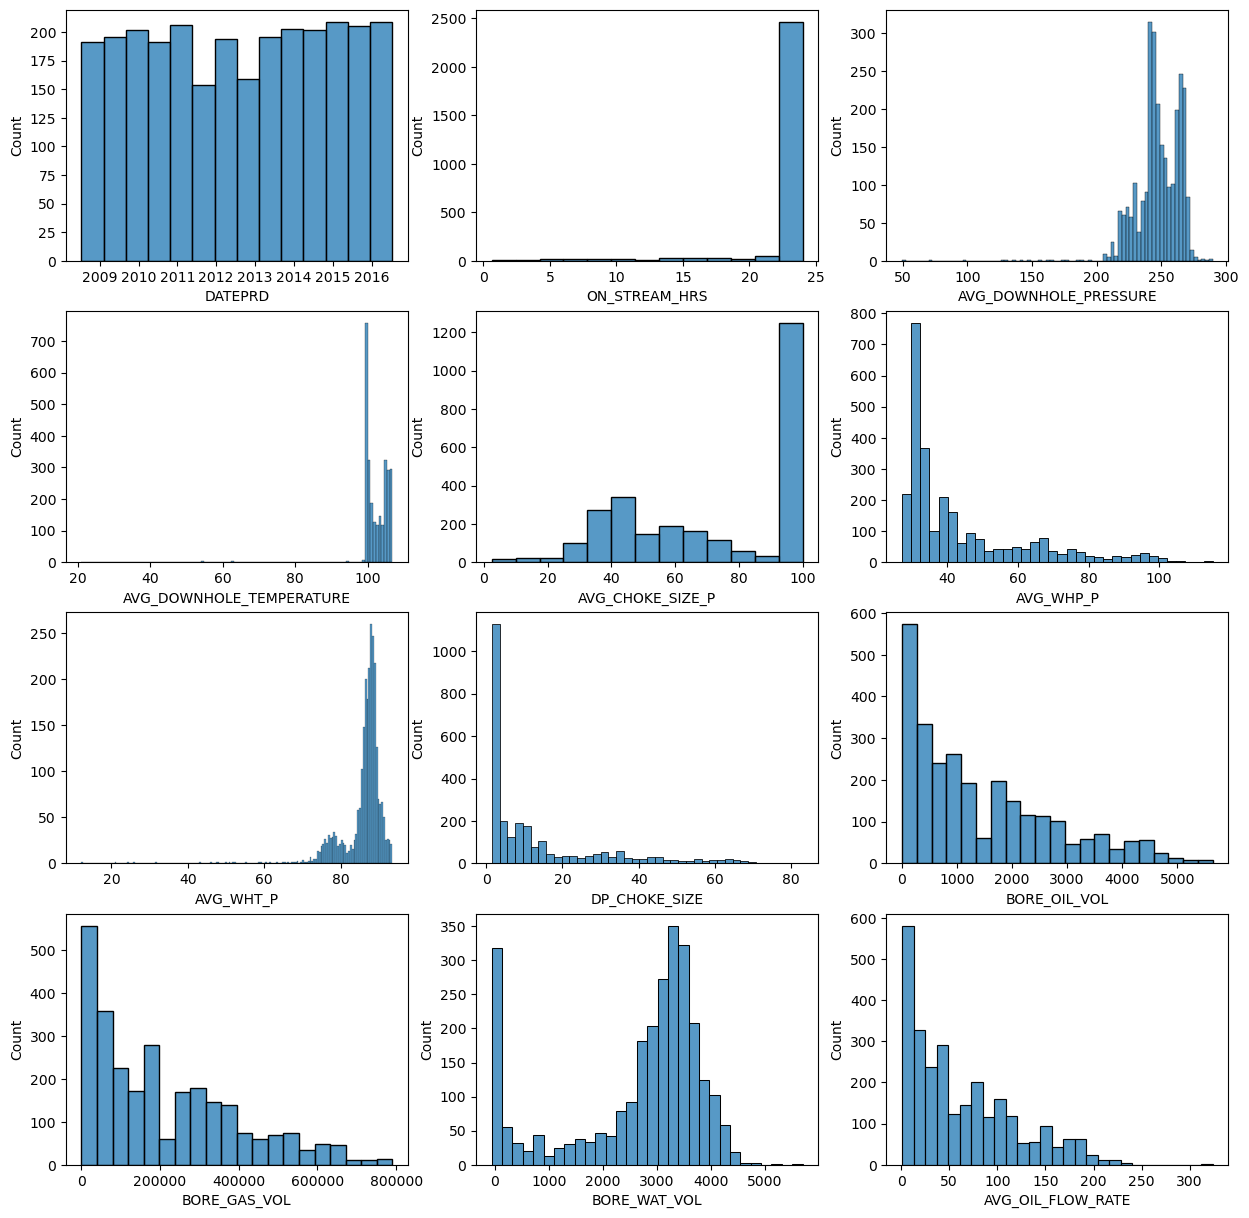

In [31]:
## Visualizing the ditribution of the features in the dataset

cols = list(df.columns)
nrows = len(cols)/3 if len(cols)%3 == 0 else len(cols)//3+1
fig, ax = plt.subplots(nrows = int(nrows), ncols = 3, figsize = (15,15))
for index, (col, axis) in enumerate(zip(cols, ax.ravel())):
    sns.histplot(data=df, x = col, ax = axis)

C:\Users\spect\AppData\Local\Temp\ipykernel_13996\2013007748.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_corr.corr()


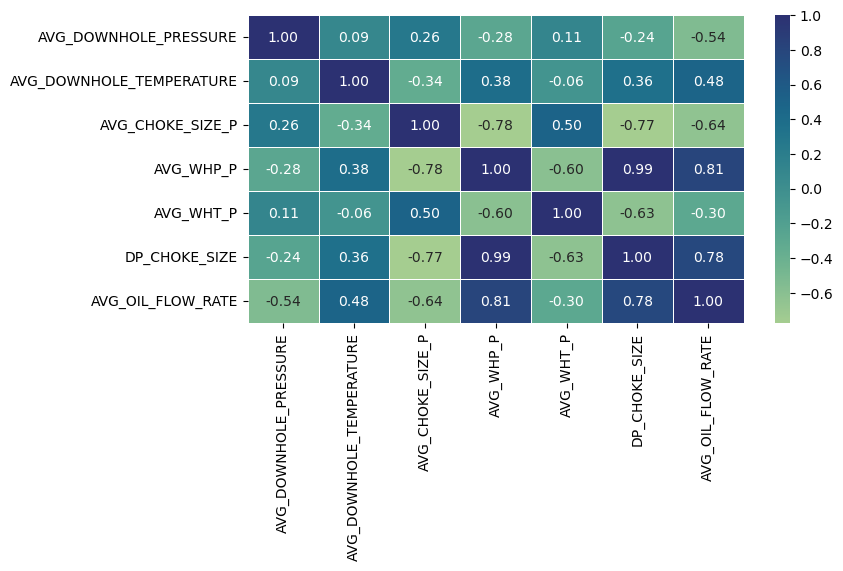

In [32]:
df_corr = df.drop(columns = ["ON_STREAM_HRS", "BORE_GAS_VOL", "BORE_WAT_VOL", "BORE_OIL_VOL"], axis = 1)
corr_matrix = df_corr.corr()
fig = plt.figure(figsize = (8,4))
ax = sns.heatmap(corr_matrix, annot = True, cmap = "crest", linewidth = 0.5, 
            annot_kws = {"fontsize": 10}, fmt=".2f")

The above boxplot shows that Wellhead Pressure is highly positively correlated to Oil Production, which is to be expected.

Also, Wellhead Pressure is highly positively correlated with Downhole Temperatue. WHy?

Also, Wellhead Pressure is very highly positively correlated to DP Choke Size, which is also to be expected. 

Also, DP Choke Size is negatively correlated to AVG Choke SIZE P which is also expected.

---

One interesting observation is that Well Head Temperature is not correlated with Downhole Temperature. Reasons for this are as follows:

The wellhead temperature of an oil well will be somewhat less than the BHT. The amount of cooling as crude flows to the surface will depend on several factors:

1. The relative amounts of oil and water
2. The specific heats of oil and water
3. The flow rate, the gas/liquid ratio
4. The vertical-flow pressure drop that controls the gas liberated and the attendant cooling effect, and the thermal heat transfer rate from the wellbore.

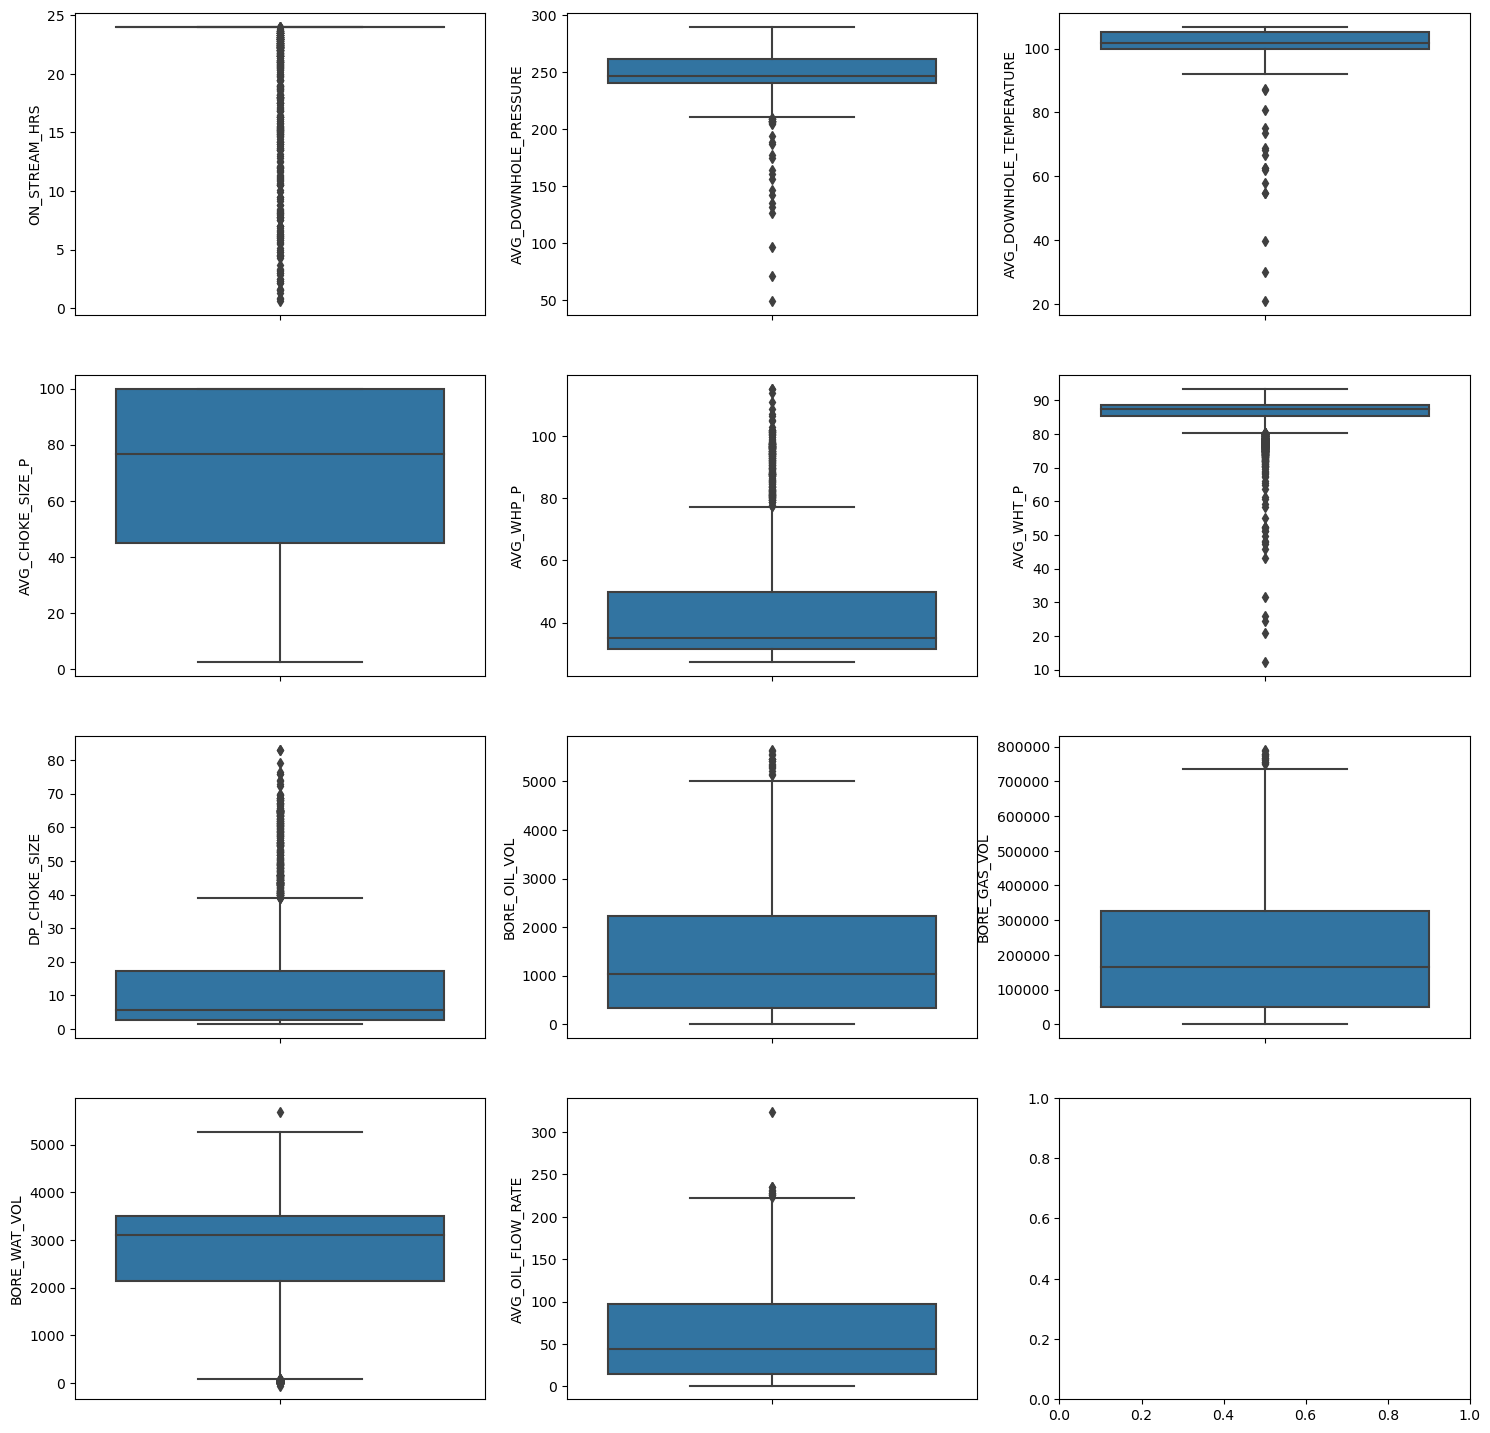

In [33]:
## Visualizing the ditribution of the features in the dataset

cols = list(df.columns[1:])
nrows = len(cols)/3 if len(cols)%3 == 0 else len(cols)//3+1
fig, ax = plt.subplots(nrows = int(nrows), ncols = 3, figsize = (18,18))
for index, (col, axis) in enumerate(zip(cols, ax.ravel())):
    sns.boxplot(data=df, y = col, ax = axis)

***

There is one clear outlier in AVG_OIL_FLOW_RATE...analysing that:

In [34]:
df[df.AVG_OIL_FLOW_RATE > 300]

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,AVG_OIL_FLOW_RATE
1365,2012-08-13,0.625,252.892348,101.88657,7.777673,46.152546,83.714672,17.2037,202.53,3754.12,-59.19,324.048


Since the above point is clearly an outlier, we will remove that point

In [35]:
df.drop(index = list(df[df.AVG_OIL_FLOW_RATE > 300].index), axis = 0, inplace = True)

***

Why are there so many values with low downhole temperatures? Is the well head temperature also low at those points? Do these points occur during the winters?

In [36]:
## Analysing the abnormally low values of downhole temperature (values less than 90 deg)

df_temp = df[(df.AVG_DOWNHOLE_TEMPERATURE < 100) & (df.AVG_DOWNHOLE_PRESSURE < 220)]
df_temp

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,AVG_OIL_FLOW_RATE
243,2009-04-04,24.00000,142.195394,62.097413,36.915852,82.265890,79.017304,49.444290,4266.19,603057.78,39.67,177.757917
246,2009-04-09,15.58334,156.704604,68.810278,32.956922,82.462544,71.992248,50.463594,2094.72,291446.14,2.62,134.420477
252,2009-04-16,17.52500,126.438256,57.945863,33.940204,76.983197,70.601237,44.686935,2452.26,337254.14,1.42,139.929244
256,2009-04-20,24.00000,161.168309,75.026294,38.396193,72.358102,78.249001,39.642990,3990.32,539753.59,2.50,166.263333
276,2009-05-11,24.00000,131.509383,62.529313,41.256309,67.970132,80.122545,34.854465,4241.75,575312.38,18.76,176.739583
311,2009-06-15,13.60833,204.891693,96.998262,33.790855,69.501117,72.837203,37.502203,1724.89,248079.85,12.74,126.752511
521,2010-01-20,24.00000,194.357709,87.218937,49.241114,52.011679,86.076854,19.134864,2789.61,389180.91,2595.68,116.233750
542,2010-02-10,24.00000,188.629729,80.615963,41.727705,60.036823,89.643162,27.782542,2521.73,355402.62,2616.02,105.072083
555,2010-02-23,23.08333,71.154596,30.076100,37.115075,63.935236,88.950753,31.642675,2144.80,307980.27,2126.16,92.915537
557,2010-02-25,18.50000,49.450440,20.959721,40.528096,60.117145,87.488834,28.340810,1709.58,243034.51,1755.05,92.409730


From the above table, it is observed that the low values of downhole temperature coexists with low values of downhole pressure. This indicates erroneous values being produced by the downhole equipment measuring the downhole pressure and temperature. Therefore, we are going to replace these values with median values.

In [37]:
## Replacing the outliers in Downhole Pressure and Downhole Temperature with their medians

temp_median = df["AVG_DOWNHOLE_TEMPERATURE"].median()
press_median = df["AVG_DOWNHOLE_PRESSURE"].median()
df["AVG_DOWNHOLE_TEMPERATURE"] = df.AVG_DOWNHOLE_TEMPERATURE.apply(lambda temp: temp_median if temp < 100 else temp)
df["AVG_DOWNHOLE_PRESSURE"] = df.AVG_DOWNHOLE_PRESSURE.apply(lambda press: press_median if press < 220 else press)

***

Doing seasonality analysis on the oil volume produced using FFT

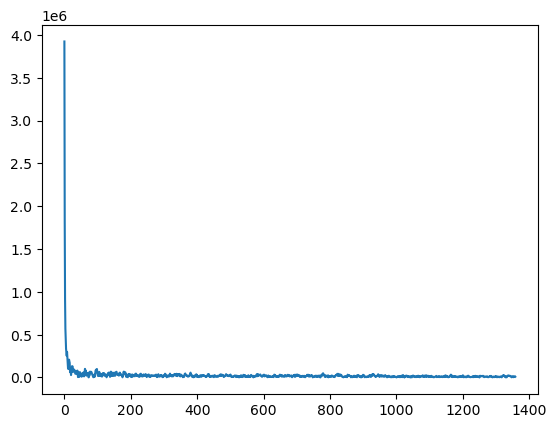

In [38]:
freq = tf.signal.rfft(df.BORE_OIL_VOL)
plt.plot(np.abs(freq)[:10000])

The above graph shows that there is no seasonal trend in the oil production volume

***

Analysing the correlation between wellhead pressure and oil flow rate

<AxesSubplot: xlabel='AVG_WHP_P', ylabel='AVG_OIL_FLOW_RATE'>

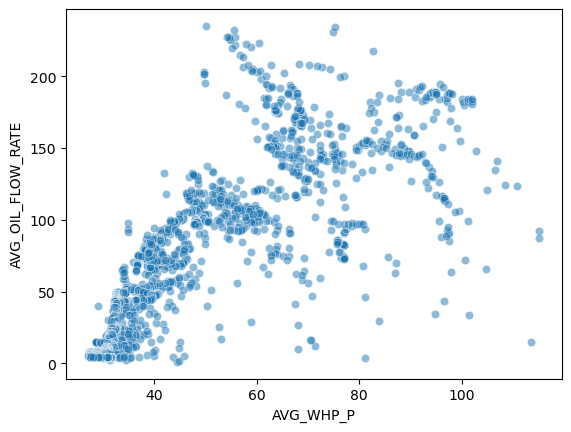

In [39]:
sns.scatterplot(x = df.AVG_WHP_P, y = df.AVG_OIL_FLOW_RATE, alpha = 0.5)

Analysing Wellhead Pressure vs Oil Flow Rate on yearwise basis for more in-depth analysis

In [40]:
df_temp = df.copy()
df_temp["Year"] = df_temp.DATEPRD.apply(lambda x: x.year)

In [41]:
years = np.unique(df_temp.Year)
years

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

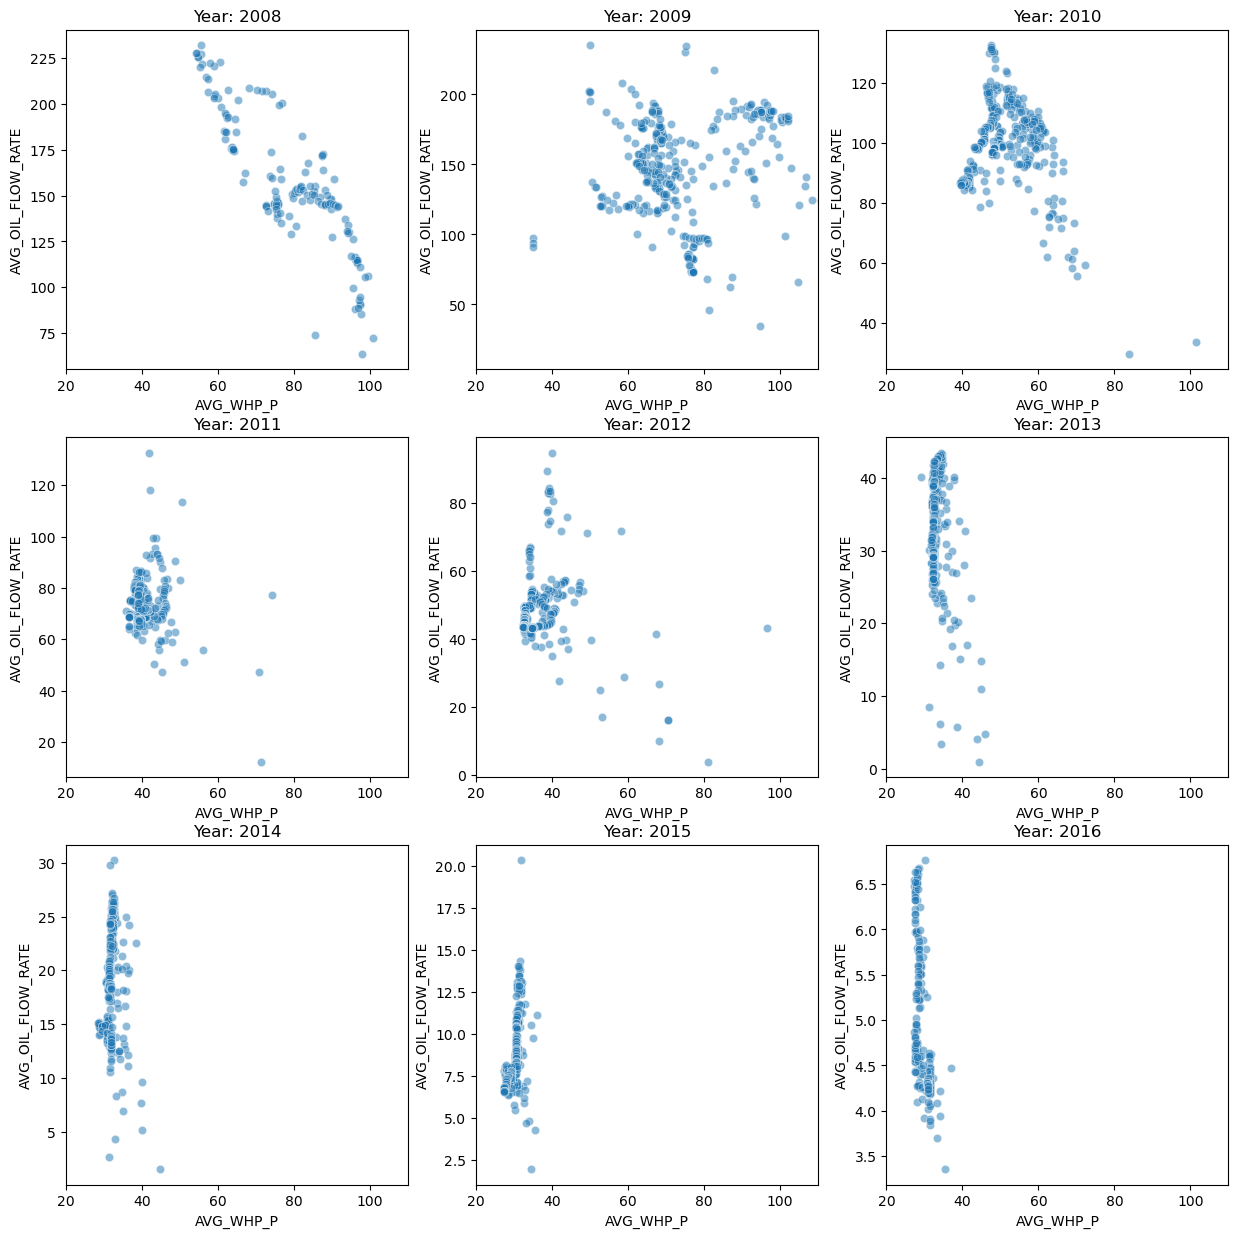

In [42]:
fig, ax = plt.subplots(nrows = 3, ncols= 3, figsize = (15,15))
for (year, axis) in zip(years, ax.ravel()):
    df_year = df_temp[df_temp.Year == year]
    sns.scatterplot(data = df_year, x = "AVG_WHP_P", y = "AVG_OIL_FLOW_RATE", alpha = 0.5, ax=axis, )
    axis.set(title = f"Year: {year}", xlim = [20, 110])

From the above plots, we can see that the high wellhead pressure datapoints (>80) mostly lie in the year 2008-09 plots, when the well was young, and producing high volumes of oil. As the time has progressed, the oil volume has also decreased alongwith the wellhead pressure. 

In [43]:
# ## Implementing the above observations and removing the outliers in Wellhead Pressure values

# df["Year"] = df.DATEPRD.apply(lambda x: x.year)
# df = df[(df.Year <= 2009) | 
#         ((df.Year == 2010) & (df.AVG_WHP_P < 80)) |
#         ((df.Year > 2010) & (df.AVG_WHP_P < 60))]

# df.drop(columns = ["Year"], inplace = True, axis = 1) ## Dropping the Year column again as its no longer needed

***

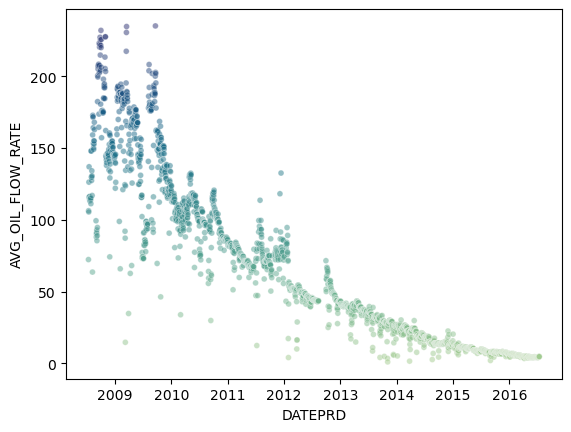

In [44]:
date_vs_prod(df)
plt.show()

# Modelling

***

### Preparing a function to apply all the pre-processing steps in a single go

In [45]:
def preprocessor(df_, train_start_date, val_date, test_date, DATEPROD = True, 
                 Day_col = False, Month_col = False, Year_col = False, scale = True):
    
    """
    Function for performing all the preprocessing steps in one go
    """
    
    # Creating a copy of the passed dataset so that the original dataset is not modified
    df = df_.copy()
    
    ## Removing Dates on which the well flowed for zero hours from the dataset
    df.drop(index = list(df[df.ON_STREAM_HRS == 0].index), axis = 0, inplace = True)
    df.reset_index(drop = True, inplace = True)
    
    ## Dropping the date points where the oil volume produced is equal to zero
    df.drop(index = list(df[df.BORE_OIL_VOL == 0].index), axis = 0, inplace = True)
    df.reset_index(drop = True, inplace = True)
    
    ## Some data points have ON_STREAM_HRS > 24...setting them to 24
    for index in df[df.ON_STREAM_HRS > 24].index:
        df.loc[index, "ON_STREAM_HRS"] = 24
    
    # Breaking the DATEPRD column into Day, Month and Year columns
    if Day_col:
        df["Day"] = df.DATEPRD.dt.day
    if Month_col:
        df["Month"] = df.DATEPRD.dt.month
    if Year_col:
        df["Year"] = df.DATEPRD.dt.year

    ## Removing features which are not needed
    features_x = ["ON_STREAM_HRS", 'BORE_GAS_VOL', 'BORE_WAT_VOL', "BORE_OIL_VOL"]
    df = df.drop(columns = features_x, axis = 1)
    
    ## Plotting graphs for visualizing the points taken into consideration while building the training, validation and 
    ## test datasets
    date_vs_prod(df)
    plt.axvline(pd.to_datetime(train_start_date), linestyle = "dotted", color = "orange")
    plt.axvline(pd.to_datetime(val_date), linestyle = "dotted", color = "orange")
    plt.axvline(pd.to_datetime(test_date), linestyle = "dotted", color = "orange")
    plt.title("ALL DATA POINTS")
    date_vs_prod(df[df.DATEPRD >= pd.to_datetime(train_start_date)])
    plt.axvline(pd.to_datetime(train_start_date), linestyle = "dotted", color = "orange")
    plt.axvline(pd.to_datetime(val_date), linestyle = "dotted", color = "orange")
    plt.axvline(pd.to_datetime(test_date), linestyle = "dotted", color = "orange")
    plt.title("DATA POINTS CONSIDERED")
    
    # Training dataset is taken to be all the data points after train_start_date and before val_date
    # Validation and testing dataset is taken to be all the data points after val_date
    df_train = df[(df.DATEPRD >= pd.to_datetime(train_start_date)) & (df.DATEPRD < pd.to_datetime(val_date))].copy()
    df_val_test = df[df.DATEPRD >= pd.to_datetime(val_date)].copy()
    
    ##_______ TO BE DONE AFTER SEPERATING TRAIN DATASET _________
    
#     ## Replacing the zero/na values in downhole pressure and temperature with the mean values
#     dhp_mean = df_train["AVG_DOWNHOLE_PRESSURE"].mean()
#     dht_mean = df_train["AVG_DOWNHOLE_TEMPERATURE"].mean()

#     for df_ in [df_train, df_val_test]:
#         dhp_index = df_[(df_.AVG_DOWNHOLE_PRESSURE.isna()) | (df_.AVG_DOWNHOLE_PRESSURE == 0)].index
#         dht_index = df_[(df_.AVG_DOWNHOLE_TEMPERATURE.isna()) | (df_.AVG_DOWNHOLE_PRESSURE == 0)].index

#         for index in dhp_index:
#             df_.loc[index, "AVG_DOWNHOLE_PRESSURE"] = dhp_mean

#         for index in dht_index:
#             df_.loc[index, "AVG_DOWNHOLE_TEMPERATURE"] = dht_mean
    
#     ## Removing outliers from the features in the training datset
#     df_train = df_train[
#         (df_train.AVG_DOWNHOLE_PRESSURE > 200) &
#         (df_train.AVG_DOWNHOLE_TEMPERATURE > 90) &
#         (df_train.AVG_WHP_P != 0) &
#         (df_train.AVG_WHP_P < 80) &
#         (df_train.AVG_WHT_P > 70) &
#         (df_train.DP_CHOKE_SIZE < 70)
#     ]
    
    # Creating X_train, y_train, X_val, y_val, X_test, y_test
    # Validation data is taken to be data points from val_date till test_date
    # Test data is taken to be data points from test_date till the last available date
    features_list = list(df_train.columns)
    features_list.remove("AVG_OIL_FLOW_RATE")

    y_train = df_train["AVG_OIL_FLOW_RATE"]
    X_train = df_train.loc[:,features_list]

    df_val = df_val_test[df_val_test.DATEPRD < pd.to_datetime(test_date)]
    df_test = df_val_test[df_val_test.DATEPRD >= pd.to_datetime(test_date)]

    y_val = df_val["AVG_OIL_FLOW_RATE"]
    X_val = df_val.loc[:,features_list]

    y_test = df_test["AVG_OIL_FLOW_RATE"]
    X_test = df_test.loc[:,features_list]
    
    # Dropping DATEPROD col
    if DATEPROD:
        for df_ in [X_train, X_val, X_test]:
            df_.drop(["DATEPRD"], axis = 1, inplace = True)
    features_ = list(X_train.columns)
    print(f" Features in the output datasets: {features_}")
    
    # Scaling the data using StandardScaler from sklearn
    if scale:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
    
    # Printing the length of X_train, X_val and X_test datasets
    print(f"Total data points taken for training/validation/testing: {len(X_train) + len(X_val) + len(X_test)}")
    for X_name, X_df in zip(["Train", "Validation", "Test"], [X_train, X_val, X_test]):
        print(f"Data points in {X_name} are: {len(X_df)}")
    
    return (features_, X_train, y_train, X_val, y_val, X_test, y_test)

## Testing the above preprocessing function 

# (X_train, y_train, X_val, y_val, X_test, y_test) = preprocessor(df_5351, train_start_date="04/01/2013",
#                                                              val_date = "06/01/2015", test_date = "01/01/2016")

In [46]:
## Function for plotting predicted values vs actual values

def predict_plot(actual, predicted, fig_title = ""):
    """
    predict_plot(actual_values, predicted_values)
    """
    import matplotlib as mpl
    cmap = mpl.cm.get_cmap("cividis")
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.scatter(actual, predicted, alpha = 0.2 , c = cmap((np.abs(actual)-np.abs(predicted))/np.abs(actual)))
    ax.set_xlabel("Actual values")
    ax.set_ylabel("Predicted values")
    ax.plot(np.linspace(actual.min(), actual.max(), 100), np.linspace(actual.min(), actual.max(), 100), "r--")
    ax.set_title(fig_title)
    sm = mpl.cm.ScalarMappable(cmap = cmap)
    cbar = plt.colorbar(sm)
    cbar.set_label('Error in predictions scaled to [0,1]', rotation=270)
    cbar.ax.set_yticklabels(['0','','','',"",'1'])
    plt.show()

### Preparing the data and trying non-time series models (linear, SVM, ensembles, NN)

In [47]:
df.DATEPRD

0      2008-07-13
1      2008-07-14
2      2008-07-15
3      2008-07-16
4      2008-07-17
          ...    
2712   2016-07-09
2713   2016-07-10
2714   2016-07-11
2715   2016-07-12
2716   2016-07-13
Name: DATEPRD, Length: 2716, dtype: datetime64[ns]

 Features in the output datasets: ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']
Total data points taken for training/validation/testing: 1261
Data points in Train are: 705
Data points in Validation are: 269
Data points in Test are: 287


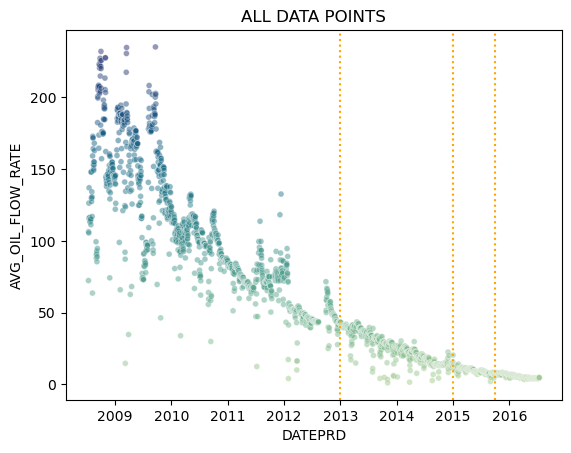

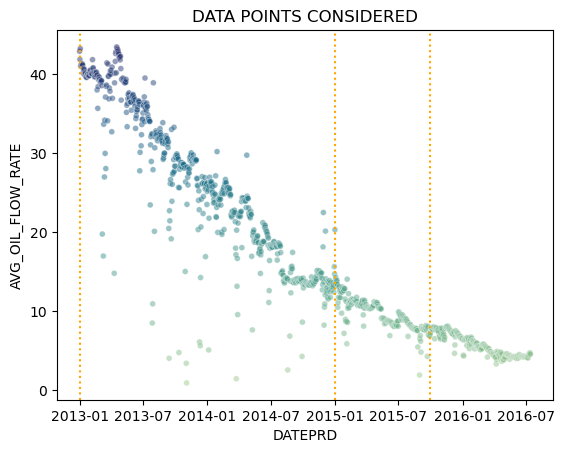

In [48]:
(features, X_train, y_train, X_val, y_val, X_test, y_test) = preprocessor(df, train_start_date="01/01/2013",
                                                             val_date = "01/01/2015", test_date = "10/01/2015",
                                                               Day_col = False, Month_col = False, Year_col = False)

***

## Implementing Decline Curve Analysis (DCA)

In [49]:
from scipy.optimize import curve_fit   #Importing the curve fit function from scipy package

def hyperbolic_equation(t, qi, b, di):
    """
    Hyperbolic decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        b: Float. Hyperbolic decline constant
        di: Float. Nominal decline rate at time t=0
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi/((1.0+b*di*t)**(1.0/b))

def exponential_equation(t, qi, di):
    """
    Exponential decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        di: Float. Nominal decline rate (constant)
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi*np.exp(-di*t)

def dca_plotter(flow_rates):
    """
    Plots DCA curves hyperbolica and exponential. Returns the constants of hyperbolic curve equation [qi_h, b, di_h]
    
    """

    def get_max_initial_production(flow_rates, number_days):
        return flow_rates[:number_days].max()
    
    def hyp_exp_plot(flow_rates, hyp_curve_fit, exp_curve_fit):
        """
        exp_curve_fit = [qi, di]
        hyp_curve_fit = [qi, b, di]
        """
        [qi_e, di_e] = exp_curve_fit
        [qi_h, b, di_h] = hyp_curve_fit
        
        fig = plt.figure(figsize = (10, 5))
        
        x = np.arange(len(flow_rates))
        fig = sns.scatterplot(x = x, y = flow_rates, label = "Flow Rate", color = "red", alpha = 0.8)
        fig = plt.plot(x, hyperbolic_equation(x, qi_h, b, di_h), label = f"Hyperbolic with b={b:.2E}",
                       color = "blue", linestyle = "dashed")
        fig = plt.plot(x, exponential_equation(x, qi_e, di_e), label = "Exponential", linestyle = "dashed", color = "k")
        plt.legend()
        return fig
    
    ## Getting the qi value
    qi = get_max_initial_production(flow_rates, 120)

    exp_values, exp_std = curve_fit(exponential_equation, np.arange(len(flow_rates)), flow_rates, bounds = (0, [qi, 100]))
    hyp_values, hyp_std = curve_fit(hyperbolic_equation, np.arange(len(flow_rates)), flow_rates, bounds = (0, [qi, 1, 100]))
    
    print(f"For exponential curve: qi = {exp_values[0]}, di = {exp_values[1]}")
    print(f"For hyperbolic curve: qi = {hyp_values[0]}, b = {hyp_values[1]}, di = {hyp_values[2]}")
    
    hyp_exp_plot(flow_rates, hyp_values, exp_values)
    
    return hyp_values

C:\Users\spect\AppData\Local\Temp\ipykernel_13996\3574825352.py:37: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return flow_rates[:number_days].max()


For exponential curve: qi = 42.920034519950654, di = 50.0
For hyperbolic curve: qi = 43.46833332873359, b = 6.275600555918789e-09, di = 0.0016763162063637136


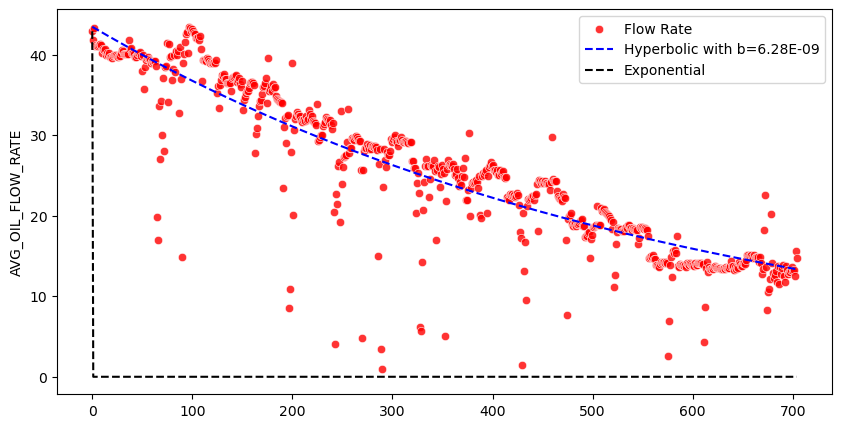

In [50]:
hyp_values = dca_plotter(y_train)

MSE for DCA Hyperbolic curve on training data: 17.03
MSE for DCA Hyperbolic curve on validation data: 2.34


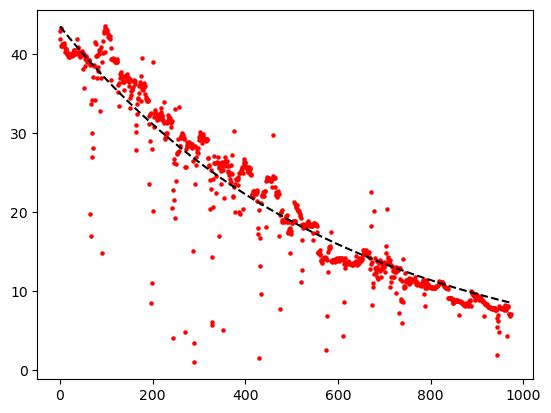

In [51]:
## Testing the hyperbolic equation obtained on training + validation data

from sklearn.metrics import mean_squared_error

Y = np.r_[y_train, y_val]
x = np.arange(len(Y))

[qi, b, di] = hyp_values

hyp = hyperbolic_equation(x, qi, b, di)
plt.scatter(x = x, y = Y, s = 5, color = "red")
plt.plot(x, hyp, linestyle = "dashed", color = "k")

## Calculating the MSE if we only use DCA for flowrate prediction

hyp_train_pred = hyp[:len(y_train)]
hyp_val_pred = hyp[len(y_train):]

hyp_train_mse = mean_squared_error(y_train, hyp_train_pred)
hyp_val_mse = mean_squared_error(y_val, hyp_val_pred)

print(f"MSE for DCA Hyperbolic curve on training data: {hyp_train_mse:.2f}")
print(f"MSE for DCA Hyperbolic curve on validation data: {hyp_val_mse:.2f}")

The Hyperbolic equation obtained from decline curve analysis fits the data points on the training and validation data very well

Thus, the hyperbolic equation can be used to check the performance of our models

***

### Including the flow rates as predicted by DCA in the training, validation, and test data

The DCA will only be fitted on the training data for model selection and training+validation data for test data performance evaluation

Here, we will fit the DCA only on the training data and then use the hyperbolic equation obtained to get predicted flow rates

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

[qi, b, di] = hyp_values  ##hyp_values is obtained by fitting the curve using dca_plotter() function

X_ = np.r_[X_train, X_val, X_test]
hyp_q = hyperbolic_equation(np.arange(len(X_)), qi, b, di)
hyp_q_scaled = scaler.fit_transform(hyp_q.reshape(-1, 1))
X_ = np.c_[X_, hyp_q_scaled]

X_train_dca = X_[:len(X_train), :]
X_val_dca = X_[len(X_train):(len(X_val)+len(X_train)), :]
X_test_dca = X_[(len(X_train) + len(X_val)):, :]

## Modifying the features list to include the DCA column feature name
if features.count("DCA_FLOW_RATE") == 0:
    features = features + ["DCA_FLOW_RATE"]

In [53]:
X_train_dca.shape, X_val_dca.shape, X_test_dca.shape

((705, 7), (269, 7), (287, 7))

In [54]:
features

['AVG_DOWNHOLE_PRESSURE',
 'AVG_DOWNHOLE_TEMPERATURE',
 'AVG_CHOKE_SIZE_P',
 'AVG_WHP_P',
 'AVG_WHT_P',
 'DP_CHOKE_SIZE',
 'DCA_FLOW_RATE']

***

Performing a final correlation analysis on the training and validation data

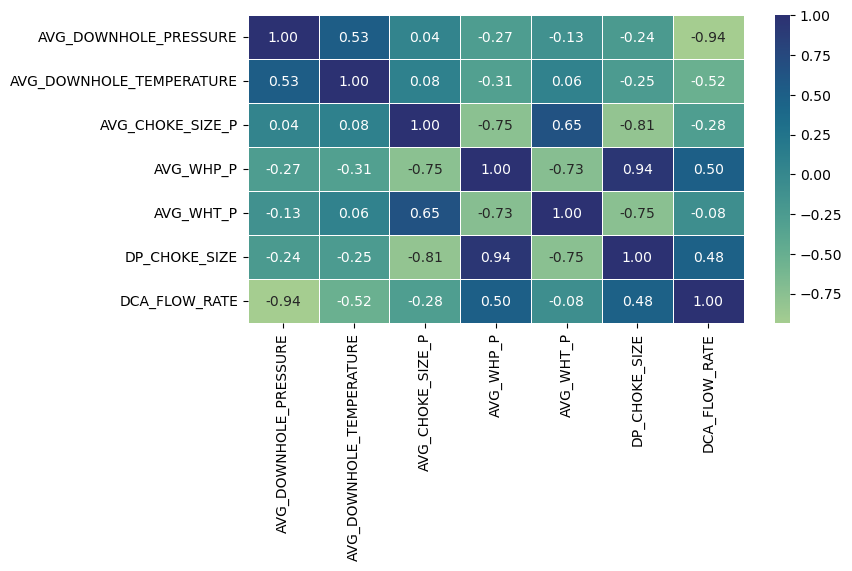

In [55]:
X_ = np.r_[X_train_dca, X_val_dca]
df_ = pd.DataFrame(X_, columns=features)
df_corr = df_.corr()
fig = plt.figure(figsize = (8,4))
ax = sns.heatmap(df_corr, annot = True, cmap = "crest", linewidth = 0.5, 
            annot_kws = {"fontsize": 10}, fmt=".2f")

***

### Creating a function to remove some specified features from a dataset

In [56]:
def feature_subsetter(features_list, features_sub, X_train, X_val, X_test):
    """
    `features_list` is a list containing the names of all the features. The order of the features in this list should 
        necessarily be the same to the order of the feautres in the dataset.
    `features_sub` is a list containing the names of the features to be kept. All other features will be removed.
    
    Return X_train, X_val, X_test
    """
    
    features_sub_index = [features_list.index(f) for f in features_sub]

    ## Subsetting the original arrays
    X_train = X_train[:, features_sub_index]
    X_val = X_val[:, features_sub_index]
    X_test = X_test[:, features_sub_index]
    return X_train, X_val, X_test

***

## 1. Trying Random Forest Model

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_jobs=-1, random_state = 42)
rf.fit(X_train_dca, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [58]:
mean_squared_error(rf.predict(X_val_dca), y_val)

19.730035318219432

In [59]:
mean_squared_error(y_train, rf.predict(X_train_dca))

0.6158910947697257

Such a significant difference in the mean squared error between training predictions and validation predictions signifies that the Random Forest model is overfitting

C:\Users\spect\AppData\Local\Temp\ipykernel_13996\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_13996\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


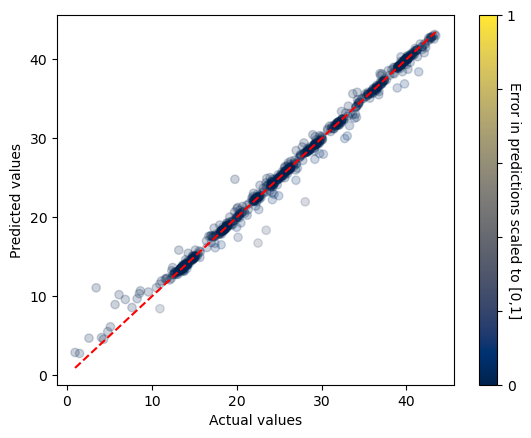

In [60]:
predict_plot(y_train, rf.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_13996\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_13996\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


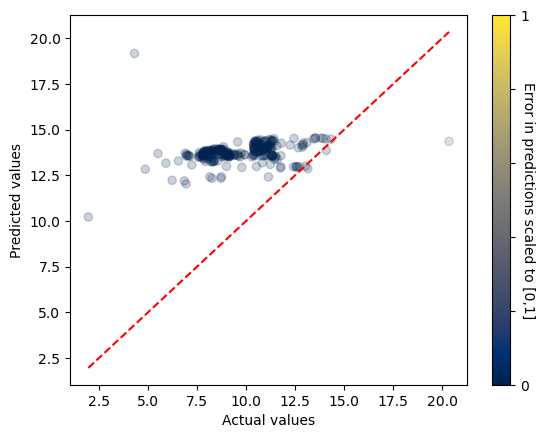

In [61]:
predict_plot(y_val, rf.predict(X_val_dca))

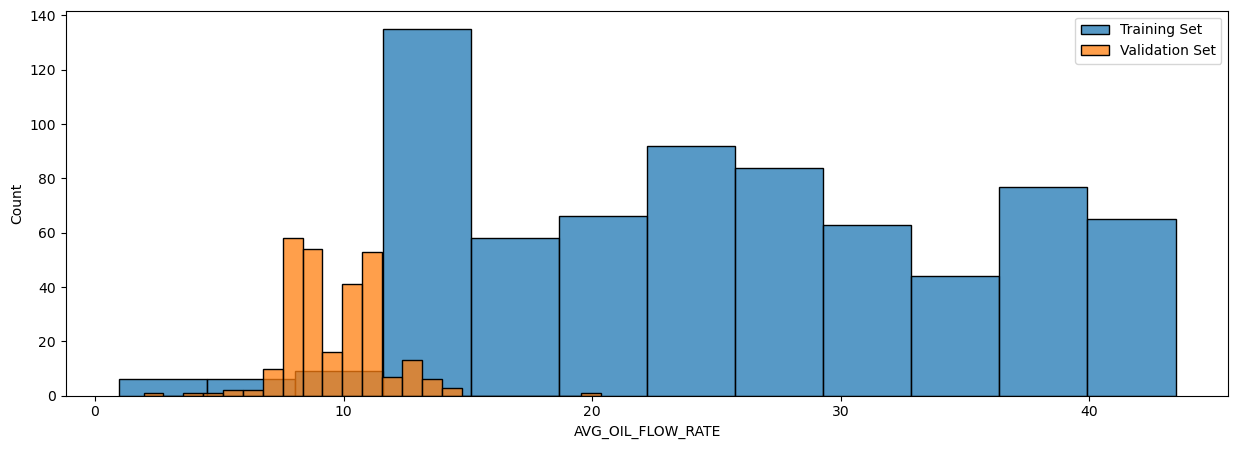

In [62]:
fig, ax = plt.subplots(figsize = (15,5))
sns.histplot(y_train, label = "Training Set")
sns.histplot(y_val, label = "Validation Set")
plt.legend()

Feature importance in the Random Forest Model

<AxesSubplot: >

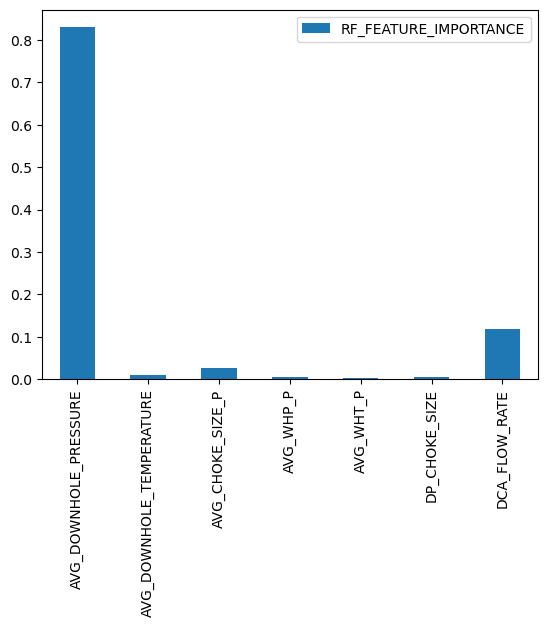

In [63]:
rf_fi = rf.feature_importances_
df_fi = pd.DataFrame(data = rf_fi, index = features, columns=["RF_FEATURE_IMPORTANCE"])
df_fi.plot.bar()

***

## 2. Trying SVM

### 2.1 SVM RBF Kernel

In [64]:
from sklearn.svm import SVR
svr = SVR(C = 100, epsilon = 6)
svr.fit(X_train_dca, y_train)

SVR(C=100, epsilon=6)

In [65]:
mean_squared_error(y_val, svr.predict(X_val_dca))

51.504699098826464

In [66]:
mean_squared_error(y_train, svr.predict(X_train_dca))

8.603629847734688

C:\Users\spect\AppData\Local\Temp\ipykernel_13996\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_13996\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


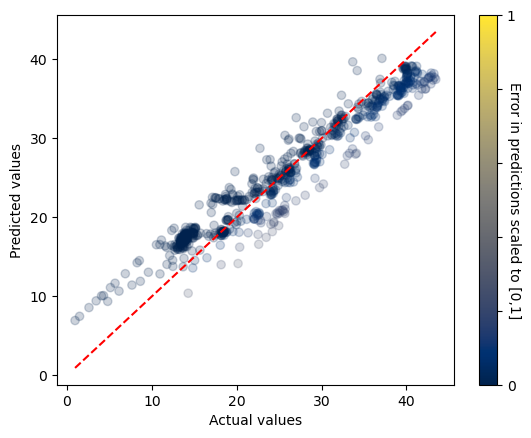

In [67]:
predict_plot(y_train, svr.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_13996\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_13996\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


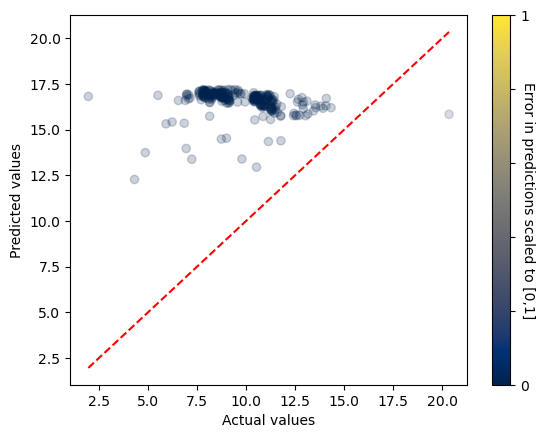

In [68]:
predict_plot(y_val, svr.predict(X_val_dca))

### 2.2 SVM Poly kernel

Degree = 3

In [69]:
from sklearn.svm import SVR
svm_poly_3 = SVR(kernel = "poly", degree = 4, C=10^6, epsilon = 0.1)
svm_poly_3.fit(X_train_dca, y_train)

SVR(C=12, degree=4, kernel='poly')

In [70]:
mean_squared_error(y_val, svm_poly_3.predict(X_val_dca))

86.7143640854858

In [71]:
mean_squared_error(y_train, svm_poly_3.predict(X_train_dca))

5.07255383132876

C:\Users\spect\AppData\Local\Temp\ipykernel_13996\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_13996\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


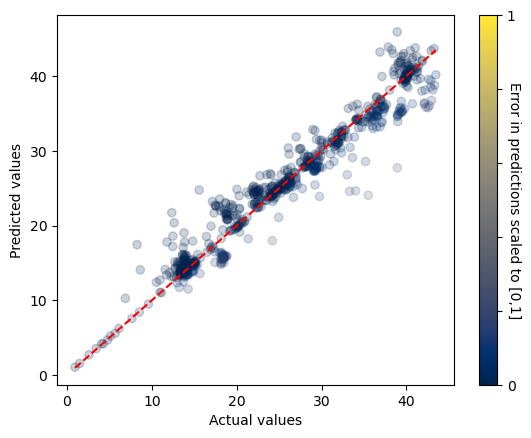

In [72]:
predict_plot(y_train, svm_poly_3.predict(X_train_dca))

## 3. Neural Networks

In [73]:
## Trying MLP lyers from scikit-learn

from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor([100,10,1], max_iter = 10000, verbose = 2)
mlp_reg.fit(X_train_dca, y_train)

Iteration 1, loss = 365.85727045
Iteration 2, loss = 360.09671765
Iteration 3, loss = 353.15537308
Iteration 4, loss = 345.40894611
Iteration 5, loss = 336.47802935
Iteration 6, loss = 326.41246920
Iteration 7, loss = 315.30386369
Iteration 8, loss = 302.98606795
Iteration 9, loss = 289.32635372
Iteration 10, loss = 274.64337462
Iteration 11, loss = 258.99163262
Iteration 12, loss = 242.85757233
Iteration 13, loss = 225.28829443
Iteration 14, loss = 207.63045268
Iteration 15, loss = 188.99815830
Iteration 16, loss = 170.37148392
Iteration 17, loss = 151.12740889
Iteration 18, loss = 131.72552893
Iteration 19, loss = 112.98406995
Iteration 20, loss = 94.89688813
Iteration 21, loss = 77.01766045
Iteration 22, loss = 61.73333655
Iteration 23, loss = 47.91191507
Iteration 24, loss = 36.33526069
Iteration 25, loss = 27.28606008
Iteration 26, loss = 20.71442523
Iteration 27, loss = 16.34537751
Iteration 28, loss = 13.64212912
Iteration 29, loss = 12.09543950
Iteration 30, loss = 11.24964383


Iteration 280, loss = 2.24960708
Iteration 281, loss = 2.25116494
Iteration 282, loss = 2.24880435
Iteration 283, loss = 2.24895565
Iteration 284, loss = 2.23752628
Iteration 285, loss = 2.23215425
Iteration 286, loss = 2.23431747
Iteration 287, loss = 2.22805730
Iteration 288, loss = 2.22335180
Iteration 289, loss = 2.23069929
Iteration 290, loss = 2.22587691
Iteration 291, loss = 2.21715285
Iteration 292, loss = 2.20990485
Iteration 293, loss = 2.20904660
Iteration 294, loss = 2.21292900
Iteration 295, loss = 2.20848502
Iteration 296, loss = 2.20652081
Iteration 297, loss = 2.19601661
Iteration 298, loss = 2.19880795
Iteration 299, loss = 2.19773302
Iteration 300, loss = 2.18872568
Iteration 301, loss = 2.18615359
Iteration 302, loss = 2.17941392
Iteration 303, loss = 2.19916635
Iteration 304, loss = 2.19414215
Iteration 305, loss = 2.17296765
Iteration 306, loss = 2.17178148
Iteration 307, loss = 2.16825371
Iteration 308, loss = 2.17608723
Iteration 309, loss = 2.16423637
Iteration 

Iteration 542, loss = 1.43872583
Iteration 543, loss = 1.45312554
Iteration 544, loss = 1.44710996
Iteration 545, loss = 1.44561902
Iteration 546, loss = 1.43860197
Iteration 547, loss = 1.43379669
Iteration 548, loss = 1.43178805
Iteration 549, loss = 1.43096960
Iteration 550, loss = 1.43342323
Iteration 551, loss = 1.42654019
Iteration 552, loss = 1.42248505
Iteration 553, loss = 1.43240680
Iteration 554, loss = 1.43224295
Iteration 555, loss = 1.42371549
Iteration 556, loss = 1.41548624
Iteration 557, loss = 1.41751393
Iteration 558, loss = 1.41230088
Iteration 559, loss = 1.41126322
Iteration 560, loss = 1.40303551
Iteration 561, loss = 1.40655010
Iteration 562, loss = 1.40130689
Iteration 563, loss = 1.40375644
Iteration 564, loss = 1.39800287
Iteration 565, loss = 1.39474050
Iteration 566, loss = 1.40054387
Iteration 567, loss = 1.38944426
Iteration 568, loss = 1.39381256
Iteration 569, loss = 1.39336999
Iteration 570, loss = 1.39563695
Iteration 571, loss = 1.38599391
Iteration 

Iteration 802, loss = 1.09129128
Iteration 803, loss = 1.09807470
Iteration 804, loss = 1.09639871
Iteration 805, loss = 1.09309949
Iteration 806, loss = 1.09476811
Iteration 807, loss = 1.09111589
Iteration 808, loss = 1.09564180
Iteration 809, loss = 1.08559309
Iteration 810, loss = 1.09681965
Iteration 811, loss = 1.10362127
Iteration 812, loss = 1.09134260
Iteration 813, loss = 1.09300714
Iteration 814, loss = 1.08626549
Iteration 815, loss = 1.09381284
Iteration 816, loss = 1.07817079
Iteration 817, loss = 1.08971818
Iteration 818, loss = 1.08603784
Iteration 819, loss = 1.09105224
Iteration 820, loss = 1.10220782
Iteration 821, loss = 1.08395022
Iteration 822, loss = 1.07731642
Iteration 823, loss = 1.08342382
Iteration 824, loss = 1.08824307
Iteration 825, loss = 1.08349393
Iteration 826, loss = 1.06980331
Iteration 827, loss = 1.07562076
Iteration 828, loss = 1.07624419
Iteration 829, loss = 1.08457541
Iteration 830, loss = 1.07799987
Iteration 831, loss = 1.07614856
Iteration 

MLPRegressor(hidden_layer_sizes=[100, 10, 1], max_iter=10000, verbose=2)

In [74]:
mean_squared_error(y_val, mlp_reg.predict(X_val_dca))

1.5153771954851172

In [75]:
mean_squared_error(y_train, mlp_reg.predict(X_train_dca))

1.9615079714475987

C:\Users\spect\AppData\Local\Temp\ipykernel_13996\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_13996\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


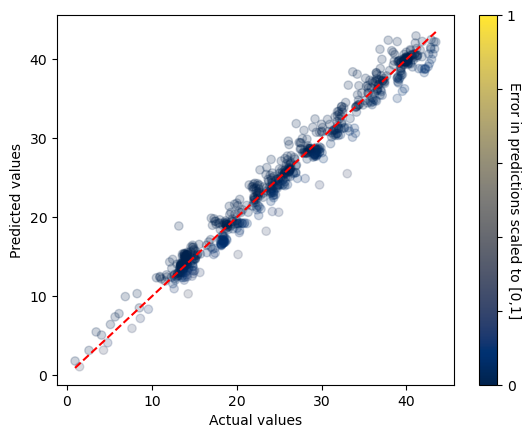

In [76]:
predict_plot(y_train, mlp_reg.predict(X_train_dca))

C:\Users\spect\AppData\Local\Temp\ipykernel_13996\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_13996\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


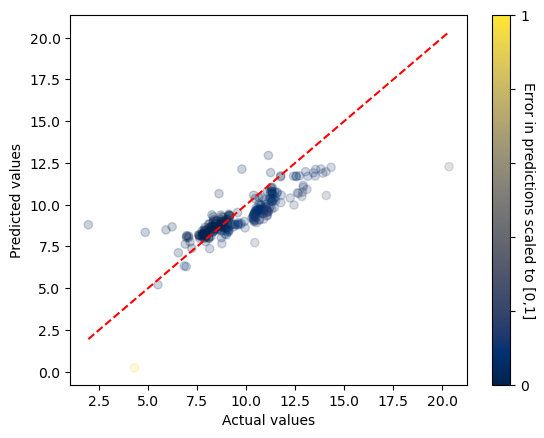

In [77]:
predict_plot(y_val, mlp_reg.predict(X_val_dca))

In [76]:
dense_nn = keras.models.Sequential([
    keras.layers.InputLayer(input_shape = X_train.shape[1:]),
    keras.layers.Dense(2000, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(1500, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(1000, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(700, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(400, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(200, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(100, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(1, activation = "relu")
])
dense_nn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 2000)              18000     
                                                                 
 dense_65 (Dense)            (None, 1500)              3001500   
                                                                 
 dense_66 (Dense)            (None, 1000)              1501000   
                                                                 
 dense_67 (Dense)            (None, 700)               700700    
                                                                 
 dense_68 (Dense)            (None, 400)               280400    
                                                                 
 dense_69 (Dense)            (None, 200)               80200     
                                                                 
 dense_70 (Dense)            (None, 100)              

In [77]:
## Tensorboard utility time function
import os
import time

def tensorboard_dir_gen():
    root_dir = os.path.join(os.curdir, "my_logs")
    curr_time = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    curr_dir = os.path.join(root_dir, curr_time)
    return curr_dir

In [78]:
dense_nn.compile(optimizer = keras.optimizers.SGD(), loss = "mean_squared_error")
# early_stopping = keras.callbacks.EarlyStopping(patience = 50, monitor = "val_loss")
# tensorboard_callback = keras.callbacks.TensorBoard(tensorboard_dir_gen())
history = dense_nn.fit(X_train, y_train, epochs = 50
#                        ,callbacks = [early_stopping, tensorboard_callback]
                      )

Epoch 1/50
24/24 [==============================] - 1s 15ms/step - loss: 204171193509999701655552.0000
Epoch 2/50
24/24 [==============================] - 0s 19ms/step - loss: 296675.7500
Epoch 3/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7812
Epoch 4/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7500
Epoch 5/50
24/24 [==============================] - 0s 16ms/step - loss: 296675.7500
Epoch 6/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7500
Epoch 7/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7812
Epoch 8/50
24/24 [==============================] - 0s 16ms/step - loss: 296675.7500
Epoch 9/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7500
Epoch 10/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7812
Epoch 11/50
24/24 [==============================] - 0s 16ms/step - loss: 296675.7500
Epoch 12/50
24/24 [==========================

In [312]:
mean_squared_error(y_val_old, mlp_reg.predict(X_val_old))

717.4581153892362

C:\Users\spect\AppData\Local\Temp\ipykernel_12600\1171456457.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_12600\1171456457.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


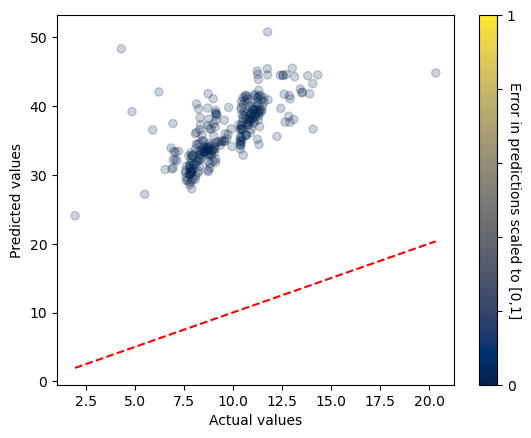

In [314]:
predict_plot(y_val_old, mlp_reg.predict(X_val_old))

In [379]:
X_train

array([[ 0.27079429,  0.39578247, -1.00925478, ..., -0.14665896,
        -0.7770423 ,  0.6411951 ],
       [ 0.27079429, -2.16757159, -0.15234888, ..., -1.40967338,
        -0.63693635,  0.13252811],
       [ 0.27079429, -0.30289548, -0.50561004, ...,  0.24220205,
        -0.56931699,  0.13252811],
       ...,
       [ 0.27079429,  1.54771727, -1.31691491, ...,  0.09833602,
        -0.58333477,  1.14986209],
       [ 0.06002342,  1.72465943, -1.3229508 , ..., -0.42882352,
        -0.47668078,  1.14986209],
       [ 0.27079429, -1.03975745, -0.31456211, ..., -0.60328929,
        -0.75090469,  0.13252811]])

In [370]:
X_val.shape

(210, 8)

## 4. RNN's 

In [79]:
X_train

array([[ 0.26903972, -0.89826773,  0.41537521, ..., -0.55674141,
        -0.18189645, -1.19724647],
       [-0.43664195, -1.84402633,  1.98403524, ...,  0.48036798,
         1.59641776, -1.19724647],
       [ 0.26903972, -1.64550805,  1.64909637, ...,  0.7905657 ,
         0.31658432, -1.19724647],
       ...,
       [ 0.26903972,  0.75129244, -0.99981638, ...,  0.1816398 ,
        -0.67255329,  0.19251283],
       [ 0.26903972,  1.17200014, -1.05668267, ..., -0.08823194,
         1.26432722,  0.19251283],
       [ 0.06523142,  1.49000221, -1.08556253, ..., -1.09633111,
         2.06060776,  0.19251283]])

In [ ]:
rnn_model = keras.models.Sequential([
    keras.layers.
])